# Table of Contents
 <p><div class="lev1 toc-item"><a href="#AfSIS-Soil-Chemistry-Dataset-Usage-Tutorial" data-toc-modified-id="AfSIS-Soil-Chemistry-Dataset-Usage-Tutorial-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AfSIS Soil Chemistry Dataset Usage Tutorial</a></div><div class="lev2 toc-item"><a href="#Prerequisities" data-toc-modified-id="Prerequisities-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Prerequisities</a></div><div class="lev2 toc-item"><a href="#Downloading-the-Soil-Chemistry-Dataset-from-AWS" data-toc-modified-id="Downloading-the-Soil-Chemistry-Dataset-from-AWS-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Downloading the Soil Chemistry Dataset from AWS</a></div><div class="lev2 toc-item"><a href="#Loading-OPUS-spectra" data-toc-modified-id="Loading-OPUS-spectra-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Loading OPUS spectra</a></div><div class="lev2 toc-item"><a href="#3.-Adding-geographical-references" data-toc-modified-id="3.-Adding-geographical-references-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>3. Adding geographical references</a></div><div class="lev2 toc-item"><a href="#4.-Wet-chemistry" data-toc-modified-id="4.-Wet-chemistry-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>4. Wet chemistry</a></div><div class="lev2 toc-item"><a href="#Modelling" data-toc-modified-id="Modelling-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Modelling</a></div>

# AfSIS Soil Chemistry Dataset - Usage Tutorial¶

QED | https://qed.ai | info@qed.ai  

This tutorial illustrates the kind of data included in the AfSIS Soil Chemistry Dataset hosted at the Registry of Open Data on AWS, and how it can be used in simple descriptive analyses and machine learning models.

## Prerequisities

In this tutorial, we require python3.6 with the following packages installed: 

* To download data:
    * aws-cli
* To parse and manage datasets:
    * brukeropusreader
    * pandas 
    * tqdm
* To make plots:
    * matplotlib
    * folium
    * seaborn
* To train machine learning models:
    * xgboost
    * scikit-learn

You can install all of this packages with one command:

In [1]:
! pip install awscli brukeropusreader tqdm pandas matplotlib folium seaborn scikit-learn xgboost           

     |████████████████████████████████| 91 kB 288 kB/s eta 0:00:01
     |████████████████████████████████| 109.7 MB 50.2 MB/s eta 0:00:01     |███████████████████████████████▉| 109.3 MB 50.2 MB/s eta 0:00:01
  Using cached rsa-3.4.2-py2.py3-none-any.whl (46 kB)
  Created wheel for brukeropusreader: filename=brukeropusreader-1.3.4-py3-none-any.whl size=5327 sha256=13011bb2f7adf0981f288c939304ad42ecdd95707707c0bfe4c363721d88adae
  Stored in directory: /home/feli/.cache/pip/wheels/ee/9c/e1/07c1426091abdfe9f9a908dce4630c97fa5ca779173b57cae4
Successfully built brukeropusreader
  Attempting uninstall: rsa
    Found existing installation: rsa 4.0
    Uninstalling rsa-4.0:
      Successfully uninstalled rsa-4.0


##  Downloading the Soil Chemistry Dataset from AWS

Download s3 bucket content with the `aws-cli` command line tool. Run `aws configure` beforehand to set your credentials.

In [1]:
! aws s3 sync s3://afsis afsis

## Loading OPUS spectra

OPUS spectra can be opened with the [brukeropusreader](https://github.com/qedsoftware/brukeropusreader) package. 

The function `brukeropusreader.read_file` parses the binaries and returns a data structure containing information about the wave numbers, absorbance spectra, and file metadata. 
You can change path in variable `SPECTRA_PATH` to choose which files you want to work with.
In this tutorial we will use `Bruker_MPA/*` spectra.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from brukeropusreader import read_file
from tqdm.notebook import tqdm

In [2]:
SPECTRA_DIR = 'Bruker_MPA/*'

AFSIS_PATH = Path('afsis/2009-2013/Dry_Chemistry/ICRAF/')
names = []
spectra = []

for path in tqdm(AFSIS_PATH.glob(SPECTRA_DIR)):
    if path.is_file():
        spect_data = read_file(path)
        spectra.append(spect_data["AB"])
        names.append(path.stem)
wave_nums = spect_data.get_range()

    
column_names = ['{:.3f}'.format(x) for x in wave_nums]
spectra_df = pd.DataFrame(spectra, index=names, columns=column_names)
spectra_df.head()

,12493.177,12489.320,12485.463,12481.606,12477.749,12473.892,12470.034,12466.177,12462.320,12458.463,...,3633.397,3629.540,3625.683,3621.826,3617.969,3614.111,3610.254,3606.397,3602.540,3598.683
icr048771,0.569734,0.567334,0.563958,0.561916,0.566201,0.576324,0.582327,0.580364,0.575316,0.571567,...,2.825614,2.579826,2.442910,2.514680,2.904547,3.255979,3.390758,2.678983,2.325123,2.294013
icr006475,0.372753,0.374612,0.376858,0.378736,0.379637,0.378845,0.378273,0.379005,0.380512,0.381878,...,2.651364,2.597065,2.518193,2.458594,2.374583,2.265884,2.238101,2.366419,2.437151,2.330782
icr049655,0.757905,0.760912,0.768835,0.774784,0.776299,0.774510,0.767632,0.755474,0.749564,0.760284,...,2.519191,2.605128,2.726885,2.414704,2.266285,2.281268,2.372980,2.454444,2.784879,2.597409
icr033446,0.528460,0.528506,0.531552,0.539877,0.548673,0.547930,0.539511,0.534801,0.535950,0.539777,...,2.434533,2.319116,2.280555,2.249827,2.238850,2.279952,2.393829,2.423945,2.373254,2.374630
icr024995,0.421899,0.421988,0.424614,0.428034,0.428495,0.427250,0.428735,0.431618,0.431766,0.430904,...,2.296725,2.270171,2.256638,2.194890,2.172286,2.169395,2.148716,2.077416,2.027816,2.045081


In [3]:
spectra_df.shape

(1907, 2307)

Here we plot a few of the spectra. 

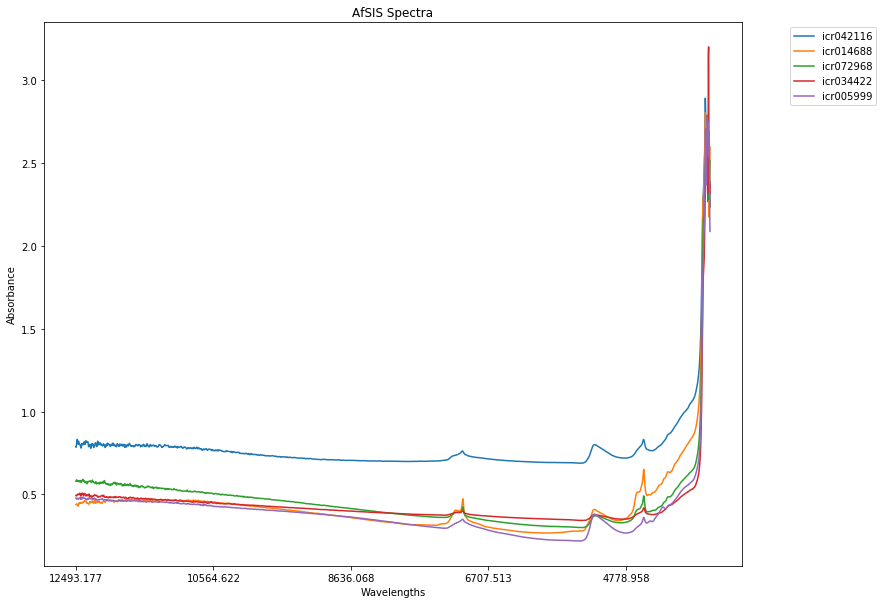

In [4]:
fig = spectra_df.sample(5, random_state=55).T.plot(figsize=(12.5, 10), title='AfSIS Spectra')
fig.set_xlabel("Wavelengths")
fig.set_ylabel("Absorbance")
fig.legend(
    loc='best',
    bbox_to_anchor=(1.2, 1),

)

## 3. Adding geographical references

The AfSIS Soil Chemistry Dataset contains georeferences for each spectra. 
You can use them to locate every measurement on a map.

In [3]:
GEOREFS_FILE = 'afsis/2009-2013/Georeferences/georeferences.csv'
georefs_df = pd.read_csv(GEOREFS_FILE)

In [4]:
import folium
m = folium.Map(location=[-3.5, 35.6], tiles="stamenwatercolor", zoom_start=3)
 
for _, row in georefs_df.iterrows():
    if row[['Latitude', 'Longitude']].notnull().all():
        folium.Marker([row['Latitude'], 
                       row['Longitude']], 
                      popup=row['SSN']
                     ).add_to(m)

m

![afsis_map](img/folium.png "AfSIS Map")


You can also count the number of samples in each country:

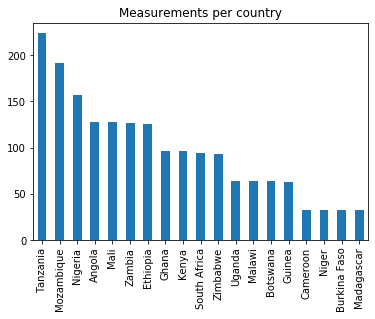

In [5]:
pd.value_counts(georefs_df['Country']).plot.bar(title='Measurements per country')

The georeferences table also contains many other pieces of metadata, as shown below:

In [6]:
georefs_df.head()

,SSN,Public,Latitude,Longitude,Cluster,Plot,Depth,Soil material,Scientist,Site,Country,Region,Cultivated,Gid
0,icr025136,True,-6.851620,34.243313,16,7,sub,NaN,Tor Vagen,Itende,Tanzania,East Africa,False,599
1,icr068579,True,11.280658,8.166768,9,1,top,Pamp.9.1.Topsoil.Std fine soil,Jerome Tondoh,Pampaida,Nigeria,West Africa,NaN,1487
2,icr048978,True,-29.972100,22.710200,1,1,sub,Prie.1.1.Subsoil.Std fine soil,George Van Zijl,Prieska,South Africa,South Africa,False,786
3,icr056481,True,-16.066365,28.326498,15,1,sub,Mong.15.1.Subsoil.Std fine soil,L.T.Desta,Monga,Zambia,South Africa,True,1065
4,icr034190,True,8.158693,9.930640,15,1,top,Ibi.15.1.Topsoil.Std fine soil,Jerome Tondoh,Ibi,Nigeria,West Africa,True,655


## 4. Wet chemistry

The AfSIS Soil Chemistry dataset contains wet chemistry data taken at each sampling location.

You can select which wet chemistry dataset you want to work with in `WET_CHEM_PATH`variable and which elements you want to plot in `elements` array.

In [5]:
wet_chem_df = pd.read_csv('afsis/2009-2013/Wet_Chemistry/CROPNUTS/Wet_Chemistry_CROPNUTS.csv')
wet_chem_df.head()

,SSN,Public,EC,ExAc,ExBas,M3 Al,M3 B,M3 Ca,M3 Cu,M3 Fe,M3 K,M3 Mg,M3 Mn,M3 Na,M3 P,M3 S,M3 Zn,PH,PSI
0,icr006475,True,0.053,2.56,2.744241,1095.0,0.3337,207.1,1.3150,153.70,306.30,89.5,9.266,42.71,4.495,18.960,2.825,4.682,67.052495
1,icr006586,True,0.193,0.59,16.797753,1165.0,0.7899,1665.0,2.8140,126.80,1186.00,636.7,254.700,40.83,12.510,13.600,1.952,7.062,30.420552
2,icr007929,True,0.305,0.19,16.503619,727.6,0.6142,2518.0,0.2496,260.40,72.57,428.5,35.820,42.94,21.090,14.810,2.742,7.114,60.506163
3,icr008008,True,0.053,0.48,6.302775,1458.0,0.3603,734.3,1.3690,134.10,274.60,222.5,29.110,20.73,109.200,11.400,0.980,5.650,51.470143
4,icr010198,True,0.032,1.05,2.390303,2166.0,0.0100,261.8,1.6860,97.49,91.76,76.5,375.200,49.31,3.958,5.281,1.258,5.501,247.626533


In [6]:
wet_chem_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SSN     1907 non-null   object 
 1   Public  1907 non-null   bool   
 2   EC      1907 non-null   float64
 3   ExAc    1907 non-null   float64
 4   ExBas   1907 non-null   float64
 5   M3 Al   1907 non-null   float64
 6   M3 B    1907 non-null   float64
 7   M3 Ca   1907 non-null   float64
 8   M3 Cu   1907 non-null   float64
 9   M3 Fe   1907 non-null   float64
 10  M3 K    1907 non-null   float64
 11  M3 Mg   1907 non-null   float64
 12  M3 Mn   1907 non-null   float64
 13  M3 Na   1901 non-null   float64
 14  M3 P    1907 non-null   float64
 15  M3 S    1905 non-null   float64
 16  M3 Zn   1907 non-null   float64
 17  PH      1907 non-null   float64
 18  PSI     1907 non-null   float64
dtypes: bool(1), float64(17), object(1)
memory usage: 270.2+ KB


In [7]:
WET_CHEM_PATH = 'afsis/2009-2013/Wet_Chemistry/CROPNUTS/Wet_Chemistry_CROPNUTS.csv'
elements = ['M3 Ca', 'M3 K', 'M3 Mg', 'M3 P']
columns_to_load = elements + ['SSN']


wet_chem_df = pd.read_csv(WET_CHEM_PATH, index_col='SSN', usecols=columns_to_load)

You can plot the elemental distributions of all loaded samples using the `seaborn` library. 

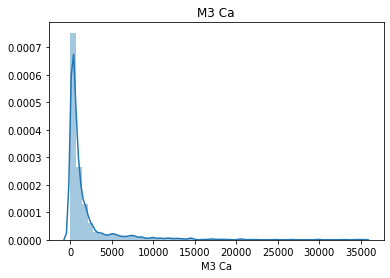

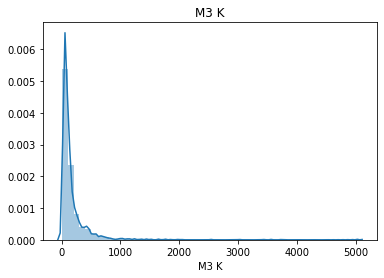

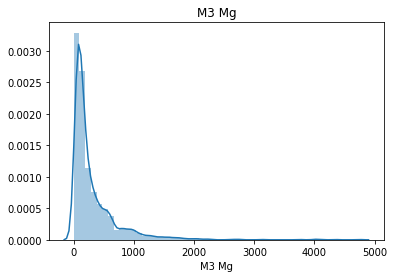

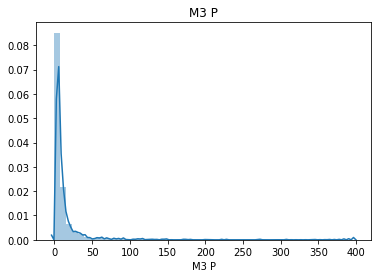

In [8]:
import seaborn as sn

for e in elements:
  sn.distplot(wet_chem_df[e]).set_title(e)
  plt.show()    

We can also check for correlations between any of the wet chemistry pairs. 

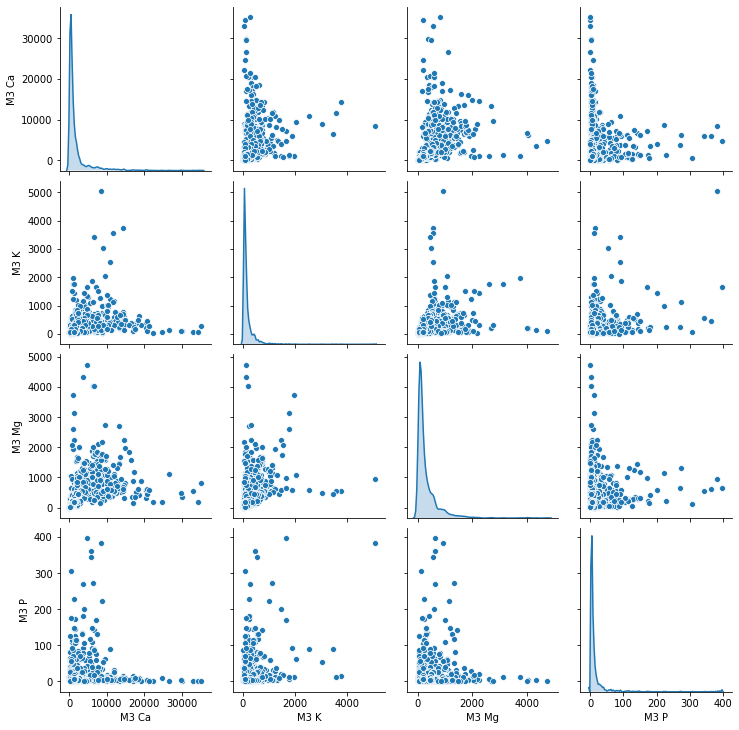

In [9]:
sn.pairplot(wet_chem_df[elements], diag_kind='kde')

## Modelling

Together, the wet chemistry and dry chemistry measurements can serve as a training dataset for performing spectral inference.
Namely, we can prepare algorithmic data models to estimate the elemental concentrations that wet chemistry would have produced, based on spectral measurements. Below is a very simple example of how this can work. 

You can set different wet chemistry path in variable `WET_CHEM_PATH` and different element in variable `Y_COLUMN`. 

In [38]:
WET_CHEM_PATH = 'afsis/2009-2013/Wet_Chemistry/CROPNUTS/Wet_Chemistry_CROPNUTS.csv'
Y_COLUMN = 'M3 Ca'

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

import numpy as np
from xgboost import XGBRegressor
wet_chem_df = pd.read_csv(WET_CHEM_PATH, index_col='SSN')
data_df = spectra_df.merge(wet_chem_df, left_index=True, right_index=True)

print(f'Training model for {Y_COLUMN}.')
print(f'{data_df.shape[0]} samples available.')


y = data_df[Y_COLUMN]
y_mask = y.notnull()
y = y[y_mask]
y = np.log1p(y)

x = data_df[column_names]
x = x[y_mask]
x = np.apply_along_axis(np.gradient, 1, x)

kfold = KFold(shuffle=True, random_state=0, n_splits=4)
model = XGBRegressor(n_estimators=500, min_child_weight=20, n_jobs=-1, objective='reg:squarederror')
    
cv_result = cross_validate(model, x, y, scoring='r2', cv=kfold)['t est_score']
print(f'CV r^2 score: {np.mean(cv_result)}')

Training model for M3 Ca.
1907 samples available.
CV r^2 score: 0.7172850328510474


In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1907 entries, icr048771 to icr033603
Columns: 2325 entries, 12493.177 to PSI
dtypes: bool(1), float64(2324)
memory usage: 33.9+ MB


In [12]:
y

icr048771    7.215975
icr006475    5.338019
icr049655    6.898715
icr033446    9.287237
icr024995    4.844187
               ...   
icr055684    5.081404
icr005999    6.922644
icr055604    4.239887
icr042896    5.655992
icr033603    9.212269
Name: M3 Ca, Length: 1907, dtype: float64

In [35]:
from src.model import basic_xgboost

In [36]:
from importlib import reload

In [37]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
%autoreload 2

In [40]:
%reload_ext autoreload

In [41]:
WET_CHEM_PATH = 'afsis/2009-2013/Wet_Chemistry/CROPNUTS/Wet_Chemistry_CROPNUTS.csv'
Y_COLUMN = 'M3 K'

basic_xgboost(spectra_df, WET_CHEM_PATH, Y_COLUMN)

TypeError: basic_xgboost() takes 2 positional arguments but 3 were given